<a href="https://colab.research.google.com/github/theouterlimitz/Solar_Power_Prediction/blob/main/03_Solar_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# --- Step 1: Load Your Curated Dataset ---
# This is the crucial first step in a new notebook.
print("Loading the curated dataset from 'solar_curated_data.pkl'...")
try:
    df = pd.read_pickle('solar_curated_data.pkl')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("ERROR: 'solar_curated_data.pkl' not found. Please ensure the file is uploaded to this Colab session.")
    df = pd.DataFrame() # Create empty df to prevent further errors


# ===================================================================
# --- Step 2: Prepare Data for Time-Series Forecasting ---
# ===================================================================
if not df.empty:
    print("\nPreparing data for time-series forecasting...")
    df_plant1 = df[df['PLANT_ID'] == 1].copy()
    features_to_use = ['AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
    data = df_plant1[features_to_use]

    # Scale the data first
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # --- Create Sequences (The "Windowing" Technique) ---
    look_back = 24
    forecast_horizon = 4

    X, y = [], []
    for i in range(len(scaled_data) - look_back - forecast_horizon + 1):
        X.append(scaled_data[i:(i + look_back), :])
        y.append(scaled_data[(i + look_back):(i + look_back + forecast_horizon), 0])

    X, y = np.array(X), np.array(y)

    # Split Data into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
    print("Data successfully transformed and split.")

    print("\nData is ready for the LSTM model!")

else:
    print("Could not load data. Skipping preparation.")

Loading the curated dataset from 'solar_curated_data.pkl'...
Dataset loaded successfully.

Preparing data for time-series forecasting...
Data successfully transformed and split.

Data is ready for the LSTM model!


**LSTM**

--- Building and Training LSTM Model ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 24, 50)         │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,579 (127.26 KB)

 Trainable params: 32,579 (127.26 KB)

 Non-trainable params: 0 (0.00 B)


Training LSTM model...
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0821 - val_loss: 0.0185
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0196 - val_loss: 0.0147
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0171 - val_loss: 0.0140
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0163 - val_loss: 0.0129
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0150 - val_loss: 0.0132
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0150 - val_loss: 0.0118
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0139 - val_loss: 0.0115
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0147 - val_loss: 0.0115
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0142 - val_loss: 0.0108
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0123 - val_loss: 0.0105
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0132 - val_loss: 0.0107
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 

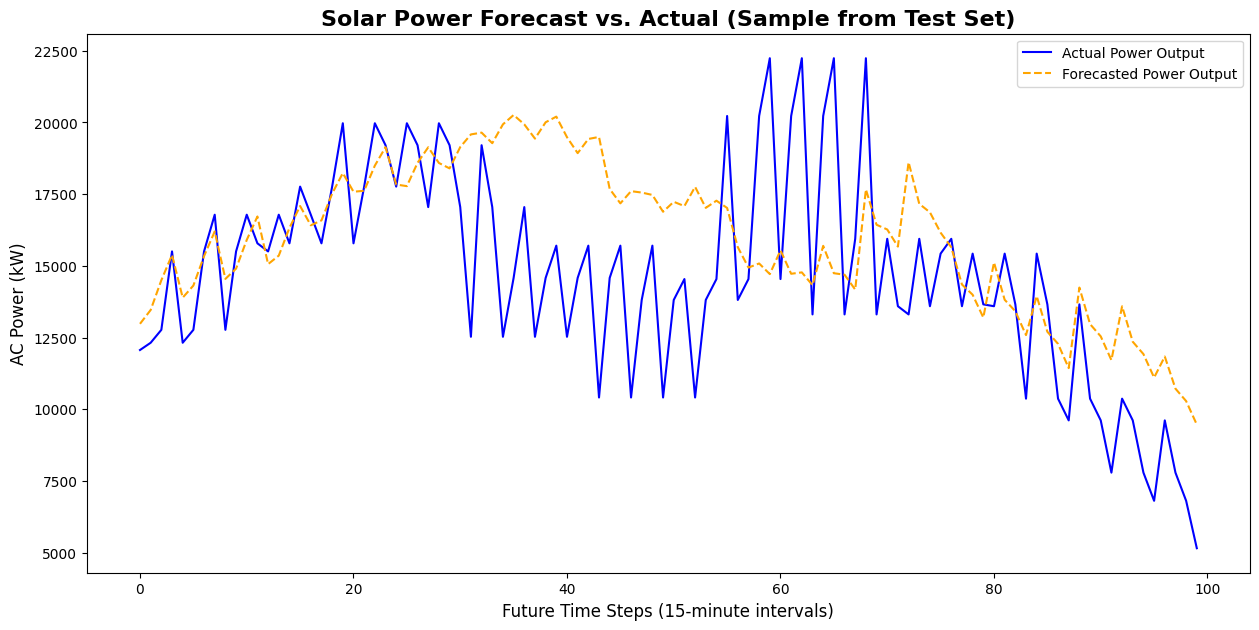

In [6]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# --- Assume 'df' is loaded and the X, y, scaler variables are in memory ---
# If you are in a new session, you need to run the data prep cell first.
# This code assumes X_train, X_test, y_train, y_test, and scaler exist.


# ===================================================================
# --- Build and Train the LSTM Model (This part was correct) ---
# ===================================================================
print("--- Building and Training LSTM Model ---")

model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(y_train.shape[1])
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.summary()

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

print("\nTraining LSTM model...")
history_lstm = model_lstm.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)
print("Model training complete.")


# ===================================================================
# --- Step 3: Evaluate the Forecast (Corrected Version) ---
# ===================================================================
print("\n--- Evaluating Forecast on Test Data ---")

# Make predictions
y_pred_scaled = model_lstm.predict(X_test)

# ** THE FIX IS HERE: Correctly reshape and inverse-transform the data **

# The model outputs a prediction for each of the 4 future time steps for each sample.
# We need to un-scale these predictions to see the real kW values.

# The scaler expects an array with 4 columns (our original features).
# We create a placeholder array and put our predictions in the first column.
# We do this for both the predictions and the actual test values.

# Create placeholder for predicted values
pred_transformed = np.zeros(shape=(len(y_pred_scaled), len(features_to_use)))
pred_transformed[:,0:forecast_horizon] = y_pred_scaled # This might need adjustment based on y_pred_scaled shape

# Since y_pred_scaled is shape (num_samples, 4) and we want to unscale the first feature,
# we need to put these values into the first column of an array with 4 columns.
y_pred_unscaled = []
for i in range(len(y_pred_scaled)):
    # Create a dummy array for each sample's forecast horizon
    dummy_array = np.zeros((forecast_horizon, len(features_to_use)))
    # Place the 4 predicted values into the first column
    dummy_array[:, 0] = y_pred_scaled[i]
    # Inverse transform and append the result
    y_pred_unscaled.extend(scaler.inverse_transform(dummy_array)[:, 0])

# Do the same for the true values (y_test)
y_test_unscaled = []
for i in range(len(y_test)):
    dummy_array = np.zeros((forecast_horizon, len(features_to_use)))
    dummy_array[:, 0] = y_test[i]
    y_test_unscaled.extend(scaler.inverse_transform(dummy_array)[:, 0])


# --- Visualize a sample of the forecast ---
print("\n--- Visualizing a Sample Forecast vs. Actual Values ---")
plt.figure(figsize=(15, 7))

# We'll plot a sample of the first 100 predicted time steps
plt.plot(y_test_unscaled[:100], color='blue', label='Actual Power Output')
plt.plot(y_pred_unscaled[:100], color='orange', label='Forecasted Power Output', linestyle='--')
plt.title('Solar Power Forecast vs. Actual (Sample from Test Set)', fontsize=16, fontweight='bold')
plt.xlabel('Future Time Steps (15-minute intervals)', fontsize=12)
plt.ylabel('AC Power (kW)', fontsize=12)
plt.legend()
plt.show()